# Linear Regression - PSC

<img src="https://miro.medium.com/v2/resize:fit:1400/0*ssbGU5VIxtVB6NrF" height=500 width=500>

> **Problem Statment**: The purpose of this [problem](https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction) is to predict and evaluate future medical expenses of individuals that help medical insurance company to make decision on charging the premium.

### Imports

In [2]:
import opendatasets as od
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




### Download the Dataset

In [56]:
od.download("https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction")

Skipping, found downloaded files in ".\insurance-premium-prediction" (use force=True to force download)


In [3]:
df=pd.read_csv(r"C:\Users\assis\Downloads\MASAI DBMS\Google colab file\Excel_Csv_file\insurance-premium-prediction\insurance.csv")

### Convert Categorical to Numerical Columns (Optional)

In [14]:
df


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [15]:
df1=df[['age','bmi','children','expenses']]
df1



,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


df.sample()

In [16]:
df1.sample()

,age,bmi,children,expenses
1075,32,29.6,1,4562.84


### Cleaning the Dataset

In [17]:
df1.isna().sum()

age         0
bmi         0
children    0
expenses    0
dtype: int64

### Splitting the Dataset

<Axes: >

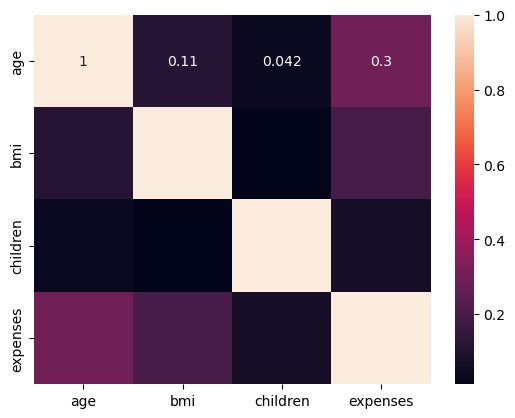

In [18]:
sns.heatmap(df1.corr(),annot=True)

### Selecting the Inputs & Output Columns

In [153]:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df1,test_size=.2,random_state=42)
train_df

,age,bmi,children,expenses
560,46,20.0,2,9193.84
1285,47,24.3,0,8534.67
1142,52,24.9,0,27117.99
969,39,34.3,5,8596.83
486,54,21.5,3,12475.35
...,...,...,...,...
1095,18,31.4,4,4561.19
1130,39,23.9,5,8582.30
1294,58,25.2,0,11931.13
860,37,47.6,2,46113.51


In [154]:
test_df

,age,bmi,children,expenses
764,45,25.2,2,9095.07
887,36,30.0,0,5272.18
890,64,26.9,0,29330.98
1293,46,25.7,3,9301.89
259,19,31.9,0,33750.29
...,...,...,...,...
109,63,35.1,0,47055.53
575,58,27.2,0,12222.90
535,38,28.0,1,6067.13
543,54,47.4,0,63770.43


In [155]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

### Fitting the Model

In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
linear=LinearRegression()


In [158]:
train_input=train_df[['bmi']]
train_output=train_df[['expenses']]
test_input=test_df[['bmi']]
test_output=test_df[['expenses']]

In [159]:
linear.fit(train_input,train_output)

LinearRegression()

In [160]:
b=linear.intercept_
b


array([1338.99953211])

In [161]:
w=linear.coef_
w

array([[392.87453666]])

In [162]:
def estimate_model(bmi,w,b):
    return ((w*bmi)+b)

In [163]:
estimate_model(5,392.87453666,1338.99953211)

3303.37221541

In [164]:
train_input.head(1)

,bmi
560,20.0


In [165]:
train_output.head(1)

,expenses
560,9193.84


In [166]:
df1.head(1)

,age,bmi,children,expenses
0,19,27.9,0,16884.92


In [176]:
train_input_m=train_df[['age','bmi']]
train_output_m=train_df[['expenses']]
test_input_m=test_df[['age','bmi']]
test_output_m=test_df[['expenses']]

In [177]:
train_input_m


,age,bmi
560,46,20.0
1285,47,24.3
1142,52,24.9
969,39,34.3
486,54,21.5
...,...,...
1095,18,31.4
1130,39,23.9
1294,58,25.2
860,37,47.6


In [168]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [181]:
model.fit(train_input_m,train_output_m)

LinearRegression()

In [170]:
b1=model.intercept_
b1

array([-5583.3863686])

In [171]:
w1=model.coef_
w1

array([[223.76873481, 331.21387746]])

In [172]:
def estimate_model_m(age,bmi,w1,w,b):
    return (w1*age)+(w*bmi)+b

In [173]:
estimate_model_m(54,31.9,223.76873481,331.21387746,-5583.3863686)

17065.848002114

In [174]:
train_input_m.head(3)

,age,bmi
560,46,20.0
1285,47,24.3
1142,52,24.9


In [152]:
train_output_m.head(3)

,expenses
196,5649.72
1209,12347.17
353,12404.88


### Making Predictions

In [34]:
train_pred=linear.predict(train_df[["bmi"]])
test_pred=linear.predict(test_df[['bmi']])


In [179]:
train_pred_m=model.predict(train_input_m)
test_pred_m=model.predict(test_input_m)

In [35]:
train_pred

array([[ 9196.49026535],
       [10885.85077299],
       [11121.57549499],
       ...,
       [11239.43785599],
       [20039.8274772 ],
       [13085.94817829]])

In [36]:
test_pred

array([[11239.43785599],
       [13125.23563196],
       [11907.32456831],
       [11435.87512432],
       [13871.69725162],
       [18193.31715489],
       [10178.676607  ],
       [16228.94447159],
       [ 8135.72901636],
       [12614.4987343 ],
       [10925.13822666],
       [13360.96035396],
       [12968.0858173 ],
       [17996.87988656],
       [17407.56808157],
       [16621.81900825],
       [18114.74224756],
       [15718.20757393],
       [12378.7740123 ],
       [11907.32456831],
       [10728.70095833],
       [14146.70942728],
       [13282.38544663],
       [16975.40609124],
       [12378.7740123 ],
       [14185.99688095],
       [15128.89576893],
       [13282.38544663],
       [11789.46220731],
       [13164.52308563],
       [12850.2234563 ],
       [13832.40979795],
       [15050.3208616 ],
       [ 9196.49026535],
       [13125.23563196],
       [16975.40609124],
       [11710.88729998],
       [13085.94817829],
       [10807.27586566],
       [15168.1832226 ],


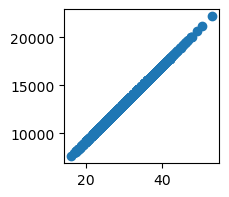

In [43]:
plt.figure(figsize=(2,2))
plt.scatter(train_input,train_pred)

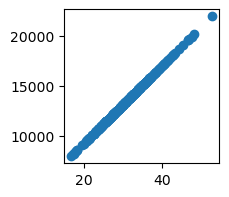

In [42]:
plt.figure(figsize=(2,2))
plt.scatter(test_input,test_pred)

### Evaluating the Model

In [44]:
from sklearn.metrics import mean_squared_error
print("root_mean_square_value---Test-Data")
mean_squared_error(test_output,test_pred,squared=False)

root_mean_square_value---Test-Data


12209.265314244578

In [45]:
from sklearn.metrics import mean_squared_error
print("root_mean_square_value---Train-Data")
mean_squared_error(train_output,train_pred,squared=False)

root_mean_square_value---Train-Data


11777.174911556065

In [46]:
from sklearn.metrics import r2_score
print("R2 Score---Test-Data")
r2_score(test_output,test_pred)

R2 Score---Test-Data


0.0398236691853987

In [47]:
from sklearn.metrics import r2_score
print("R2 Score---Train-Data")
r2_score(train_output,train_pred)

R2 Score---Train-Data


0.0390191316592422

In [54]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000
